In [1]:
from unityagents import UnityEnvironment
import numpy as np
from Agent import Agent
import torch
from collections import deque
from matplotlib import pyplot as plt

/home/shreyans/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", no_graphics=False)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
for i in range(1, 11):
    env_info = env.reset(train_mode=False)[brain_name]     
    states = env_info.vector_observations                  
    scores = np.zeros(num_agents)                          
    while True:
        actions = np.random.randn(num_agents, action_size) 
        actions = np.clip(actions, -1, 1)                  
        env_info = env.step(actions)[brain_name]           
        next_states = env_info.vector_observations         
        rewards = env_info.rewards                         
        dones = env_info.local_done                        
        scores += env_info.rewards                         
        states = next_states                               
        if np.any(dones):                                  
            break
    print(f'Score in episode {i} is {np.max(scores)}')

Score in episode 1 is 0.0
Score in episode 2 is 0.09000000171363354
Score in episode 3 is 0.0
Score in episode 4 is 0.0
Score in episode 5 is 0.0
Score in episode 6 is 0.0
Score in episode 7 is 0.0
Score in episode 8 is 0.0
Score in episode 9 is 0.0
Score in episode 10 is 0.0


In [ ]:
agent = Agent(seed=2, noise_start=0.5, update_every=2, gamma=1, t_stop_noise=30000)
episodes = 5000
play = 1000
scores = []
scores_deque = deque(maxlen=100)
scores = []
for epi in range(1, episodes+1):
    rewards = []
    env_info = env.reset()[brain_name]
    state = env_info.vector_observations
    for _ in range(play):
        action = agent.act(state)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations
        rewards_vec = env_info.rewards
        done = env_info.local_done
        agent.step(state, action, rewards_vec, next_state, done)
        state = next_state
        rewards.append(rewards_vec)
        if any(done):
            break
    episode_reward = np.max(np.sum(np.array(rewards),axis=0))
    scores.append(episode_reward)  
    scores_deque.append(episode_reward) 
    avg_scr = np.mean(scores_deque)
    scores.append(avg_scr) 
    print(f'Episode {epi}\t Average Score: {avg_scr:.3f}',end="")
    if epi % 200 == 0:
        print(f'Episode {epi}\t Average Score: {avg_scr:.3f}')
        agent.save_agents()
    if np.mean(scores_deque)>=.5:
        print(f'Environment solved in {epi} episodes!\t Average Score: {np.mean(scores_deque):.3f}')
        agent.save_agents()
        break

/home/shreyans/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 200	Average Score: 0.048
Episode 400	Average Score: 0.034
Episode 600	Average Score: 0.033
Episode 800	Average Score: 0.071
Episode 1000	Average Score: 0.069
Episode 1200	Average Score: 0.151
Episode 1400	Average Score: 0.199
Episode 1600	Average Score: 0.242
Episode 1800	Average Score: 0.135
Episode 2000	Average Score: 0.061
Episode 2200	Average Score: 0.160
Episode 2400	Average Score: 0.206
Episode 2600	Average Score: 0.134
Episode 2800	Average Score: 0.167
Episode 3000	Average Score: 0.130
Episode 3200	Average Score: 0.242
Episode 3345	Average Score: 0.502
Environment solved in 3345 episodes!	Average Score: 0.502


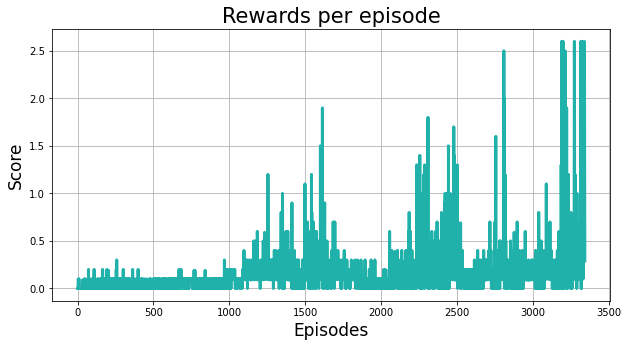

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(scores, color='lightseagreen')
plt.xlabel('Episodes', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.title(f'Rewards per episode', fontsize=20)
plt.grid()
plt.show()

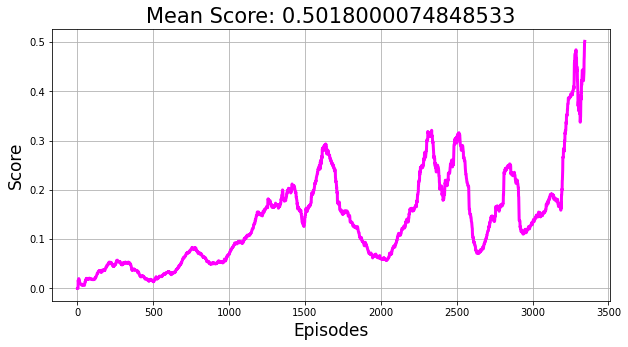

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(scores, color='fuchsia')
plt.xlabel('Episodes', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.title(f'Mean Score: {scores[-1]}', fontsize=20)
plt.grid()
plt.show()